# Linear regression: Application

In this notes, we will use linear regression model to predict insurance charge. Our main goal of this notes is addressing some practical issues we may face in real world application.

Let's first read the data.

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/liaochunyang/PIC16/refs/heads/main/PIC16B/04_ML/insurance.csv'
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We notice that there are three numeric variables and three categorical variables. The last column `charges` is the label. Before we construct machine learning model, we should analyze our data. For example, we can check the distribution of numeric variables.

<AxesSubplot:xlabel='charges', ylabel='Count'>

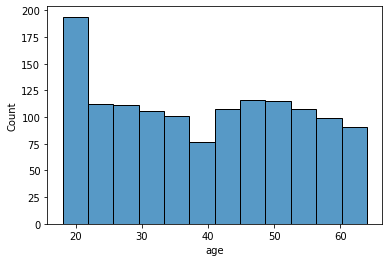

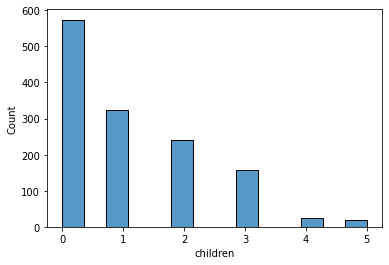

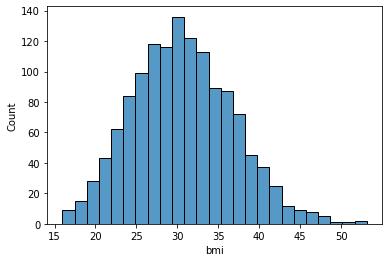

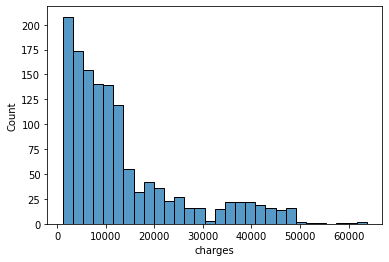

In [16]:
plt.figure(1)
sns.histplot(df,x='age')

plt.figure(2)
sns.histplot(df,x='children')

plt.figure(3)
sns.histplot(df,x='bmi')

plt.figure(4)
sns.histplot(df,x='charges')

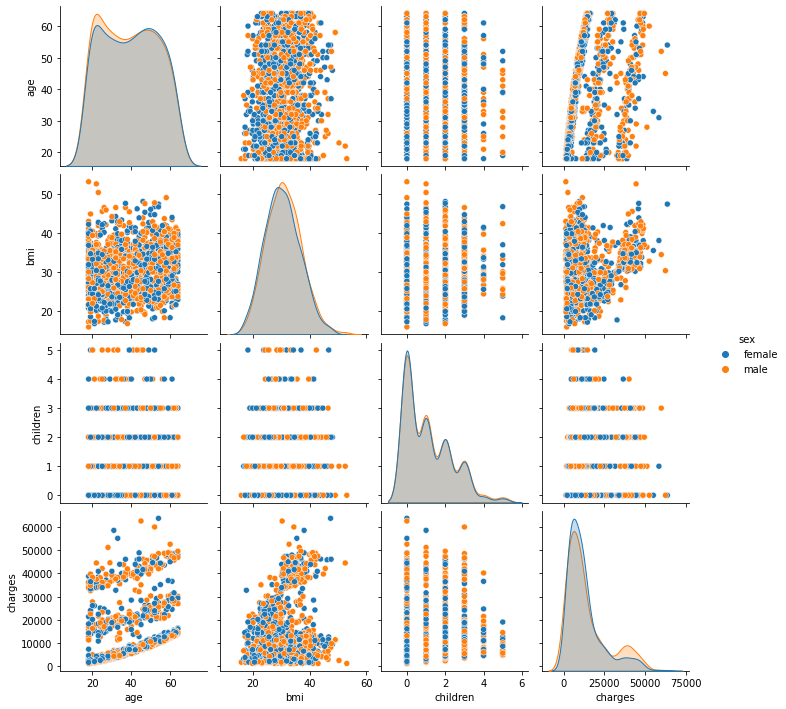

In [13]:
# Pairplot can show the relations between the variables.
sns.pairplot(df, hue='sex')

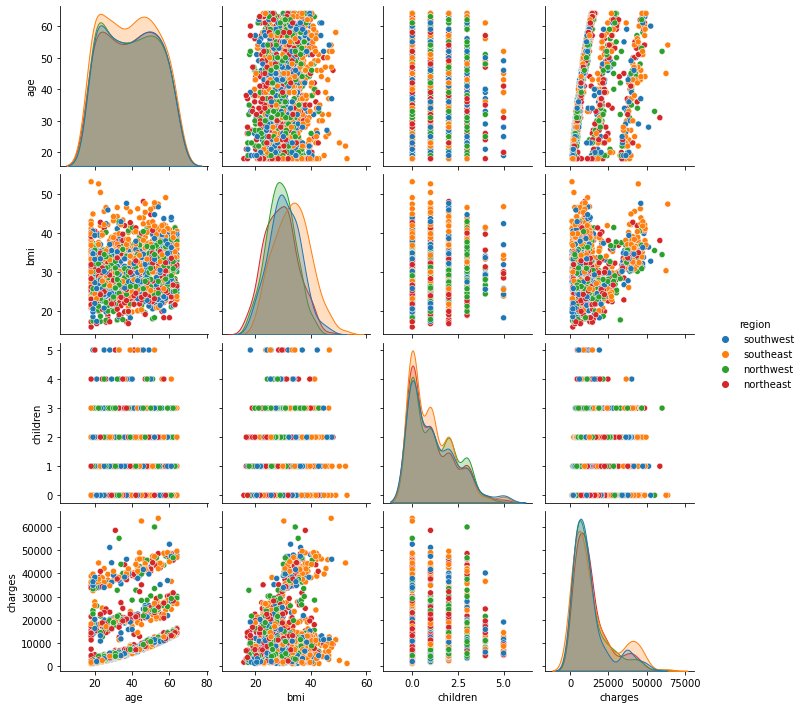

In [14]:
sns.pairplot(df, hue='region')

We can also use barplot to get some useful information. For example, the average chargers is much higher if the driver is a smoker. However, the average charges of subgroup male and female are similar. 

<AxesSubplot:xlabel='sex', ylabel='charges'>

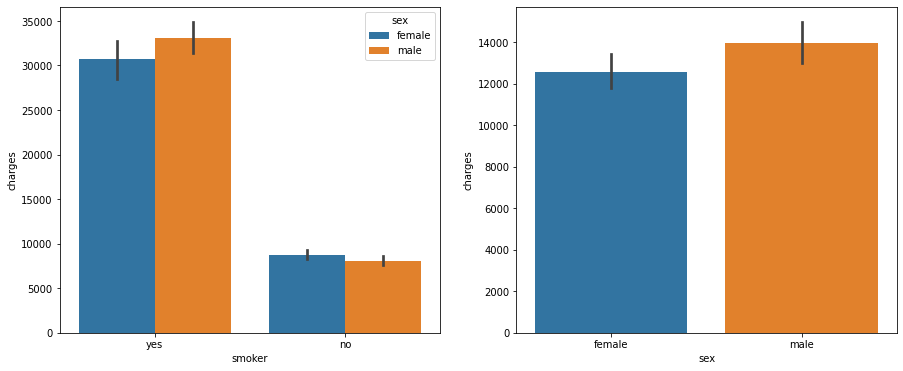

In [31]:
fig,ax = plt.subplots(1,2,figsize=(15,6))

sns.barplot(df,x='smoker',y='charges',hue='sex',ax=ax[0])

sns.barplot(df,x='sex',y='charges',ax=ax[1])

Besides data visualization, you can also use pandas dataframe to get some quantitative results, for example, the mean and standard deviation of each subgroup (groupby). We will left this part for exercise.

After data visualization, we should preprocess our data before we use them to train machine learning models. Let me write a function to change categorical columns to numerics.

In [40]:
def one_hot(df, cols):
    """
    df: pandas DataFrame
    param: cols a list of columns to encode 
    return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df


def label(df, cols):
    
    for each in cols:
        
        label_encoder = LabelEncoder()
        dummies = label_encoder.fit_transform(df[each])
        dummies = pd.DataFrame(dummies, columns=[each])
        df = pd.concat([df, dummies], axis=1)
        
        #label_encoder = LabelEncoder()
        #df[each] = label_encoder.fit_transform(df[each])
        
    return df

In [33]:
cat_all = ['sex', 'smoker', 'region']
df_medical = one_hot(df, cat_all)
df_medical

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1,0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,1,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,1,0,0,0,0,1


In [41]:
df_medical = label(df, cat_all)
df_medical

,age,sex,bmi,children,smoker,region,charges,sex,smoker,region
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


One-hot and label are two common encoding techniques. 

The next question is really interesting! Recall that we need to split our data to training dataset and test dataset because we want to create an unseen dataset for model evaluation. The natural question is 

    Do we do train_test_split before or after data pre-processing?

My understanding is the following:

- It depends on the processing you want to do. For example, one-hot encoding and label encoding should be done before train test split. 

However, some processing techniques should be done after train test split (even if I notice that some researchers do not do this). The goal of machine learning is to construct some models that can generalize well. The generalization property is measured by looking at the performance on unseen data. The role of test data is to measure the model performance, so we should make sure that test data are unseen data. It means that you cannot use test data to train the model. Moreover, you cannot leak any test data information. 


In the next example, we will do the minmax scaling for numerical variables.

In [49]:
class minmax():
    
    """
    minmax is a class of minmax normalizers.
    Each normalizer has two instance attributes called min_val and max_val with default values 0 and 1, respectively.
    They will be updated in fit_transform command.
    """
    
    def __init__(self, min_val=0, max_val=1):
        
        self.min_val = 0
        self.max_val = 1
        
    def fit_transform(self,X):
        
        """
        X is supposed to be a 1D numpy array or 2D numpy array with only one row or one column.
        This function returns normalized X which has the same shape of X.
        The minimum value of X and the maximum value of X will replace self.min_val and self.max_val.
        """
        
        self.min_val = np.min(X)
        self.max_val = np.max(X)
        
        return (X - self.min_val) / (self.max_val - self.min_val)
    
    def transform(self, X):
        """
        X is supposed to be a 1D numpy array or 2D numpy array with only one row or one column.
        This function returns normalized X which has the same shape of X.
        """
        return (X - self.min_val) / (self.max_val - self.min_val)
    
    def inverse_transform(self, X_scaled):
        
        """
        X is supposed to be a 1D numpy array or 2D numpy array with only one row or one column.
        This function takes normalized data as input and transforms it back to original scale.
        The output has the same shape of X.
        """
        
        return X_scaled * (self.max_val - self.min_val) + self.min_val

In [46]:
X_train = np.arange(4).reshape(4,1)
X_test = np.array([-1,0,1]).reshape(3,1)
X = np.row_stack((X_train, X_test))

In [50]:
# Train test split before preprocessing
minmax_scalar = minmax()
minmax_scalar.fit_transform(X_train)

array([[0.        ],
       [0.33333333],
       [0.66666667],
       [1.        ]])

In [51]:
minmax_scalar.transform(X_test)

array([[-0.33333333],
       [ 0.        ],
       [ 0.33333333]])

In [52]:
# traintest split after prepocessing
minmax_salar = minmax()
minmax_scalar.fit_transform(X)

array([[0.25],
       [0.5 ],
       [0.75],
       [1.  ],
       [0.  ],
       [0.25],
       [0.5 ]])

Notice that the results are different. In this situation, the order of train_test_split and data processing matters. In my opinion, **it is better to do train_test_split first** since we do not use test data information.

In [62]:
def numeric_scalar(X_train, X_test, y_train, y_test):
    
    minmax_scalar = MinMaxScaler()
    X_train = minmax_scalar.fit_transform(X_train)
    X_test = minmax_scalar.transform(X_test)
    
    minmax_scalar = MinMaxScaler()
    y_train = minmax_scalar.fit_transform(y_train.reshape(-1,1))
    y_test = minmax_scalar.transform(y_test.reshape(-1,1))
    
    return X_train, X_test, y_train, y_test

In [63]:
# One-hot encoding
cat_all = ['sex', 'smoker', 'region']
df_medical = one_hot(df, cat_all)
df_medical.drop(cat_all, axis = 1, inplace=True)
df_medical

# Create features and labels
X = df_medical.drop('charges',axis=1)
y = df_medical['charges']

# convert dataframes to numpy array
X = X.to_numpy()
y = y.to_numpy()

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

# minmax scaling
X_train, X_test, y_train, y_test = numeric_scalar(X_train, X_test, y_train, y_test)

In [66]:
# Construct machine learning models
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None).fit(X_train,y_train)
print(reg.intercept_, reg.coef_)

# prediction
y_pred = reg.predict(X_test)

# compute test error
err_test = np.linalg.norm(y_pred.reshape(y_test.shape)-y_test) / np.size(y_test)
print(err_test)

[0.08827016] [ 0.14444399  0.08243443  0.03128746  0.04318983  0.04508033 -0.13983985
  0.22811001  0.02795151  0.02225963  0.02322689  0.01483213]
0.008933577128909789


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None).fit(X_train[:,:3],y_train)
print(reg.intercept_, reg.coef_)

# prediction
y_pred = reg.predict(X_test[:,:3])

# compute test error
err_test = np.linalg.norm(y_pred.reshape(y_test.shape)-y_test) / np.size(y_test)
print(err_test)

[0.09840069] [0.12938845 0.07804752 0.03139813]
0.01721085076921577


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
